In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import collections
import networkx as nx

In [2]:
missing_values=['N','0000-00-00']

In [3]:
people_cs_inter=pd.read_csv('./neurotree/people_cs.tsv', sep='\t',encoding='utf-8',escapechar='\\',na_values = missing_values)
connect_cs=pd.read_csv('./neurotree/connect_cs.tsv',sep='\t', encoding='latin-1',escapechar='\\',na_values = missing_values)
inst=pd.read_csv('./neurotree/location.tsv',sep='\t',encoding='latin-1',escapechar='\\',na_values = missing_values)

In [4]:
connect_cs.shape

(38296, 11)

In [5]:
connect_cs_remove=connect_cs[~(connect_cs['pid2']==0)]

In [6]:
connect_cs_remove.shape

(16853, 11)

In [7]:
connect_cs_remove.isnull().sum()

cid               0
pid1              0
pid2              0
relation          0
location        129
locid             0
department    12012
startdate     16379
stopdate        423
addedby           0
dateadded         0
dtype: int64

In [8]:
conn_undergrad=connect_cs[connect_cs['relation']==0]
conn_grad=connect_cs[connect_cs['relation']==1]
conn_postdoc=connect_cs[connect_cs['relation']==2]
conn_rs=connect_cs[connect_cs['relation']==3]
conn_collab=connect_cs[connect_cs['relation']==4]

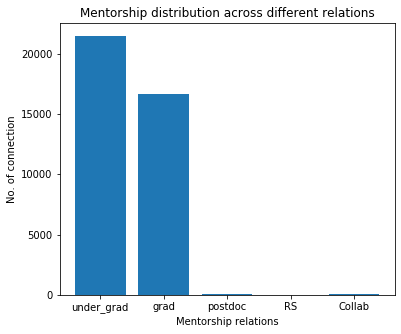

In [9]:
index1=['under_grad','grad','postdoc','RS','Collab']
conn_list=[len(conn_undergrad),len(conn_grad),len(conn_postdoc),len(conn_rs),len(conn_collab)]
fig = plt.figure(figsize=(6,5))
plt.bar(index1, conn_list)
plt.xlabel('Mentorship relations', fontsize=10)
plt.ylabel('No. of connection', fontsize=10)
plt.title('Mentorship distribution across different relations')
plt.show()

In [10]:
print('Missing mentor informtaion i.e pid2==0')
print(conn_undergrad[conn_undergrad['pid2']==0].shape[0])
print(conn_grad[conn_grad['pid2']==0].shape[0])
print(conn_postdoc[conn_postdoc['pid2']==0].shape[0])
print(conn_rs[conn_rs['pid2']==0].shape[0])
print(conn_collab[conn_collab['pid2']==0].shape[0])

Missing mentor informtaion i.e pid2==0
21443
0
0
0
0


In [11]:
conn_list

[21477, 16657, 81, 14, 67]

In [12]:
connect_cs_remove=connect_cs[~(connect_cs['pid2']==0)]
G=nx.from_pandas_edgelist(connect_cs_remove, 'pid1', 'pid2',create_using=nx.DiGraph())
G.add_nodes_from(nodes_for_adding=people_cs_inter['pid'].tolist())

In [16]:
connect_cs_remove.shape

(16853, 11)

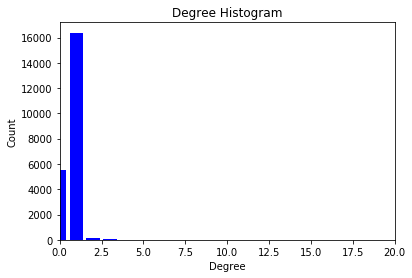

In [14]:
degree_sequence = sorted([d for n, d in G.out_degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, color='b')
plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
#plt.ylim(0,20000)
plt.xlim(0,20)
plt.show()

In [15]:
degreeCount

Counter({7: 2, 6: 1, 5: 1, 4: 10, 3: 24, 2: 163, 1: 16379, 0: 5502})